In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
position_data = np.loadtxt("../tum-vie/mocap-1d-trans-vi_gt_data/mocap_data.txt")

In [27]:
position_data.shape

(4387, 8)

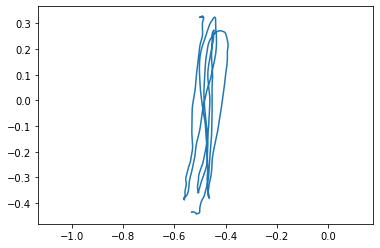

In [28]:
plt.axis("equal")
plt.plot(position_data[:,1], position_data[:,2])

In [4]:
n_directions = 8
# equivalent to a circle of distance 3 from the center

In [5]:
angles_list = np.linspace(0, 2*np.pi, n_directions, endpoint=False)

In [6]:
angles_list

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714])

In [7]:
np.rad2deg(angles_list)

array([  0.,  45.,  90., 135., 180., 225., 270., 315.])

In [8]:
vel_x = np.array([(xf - xi) for xi, xf in zip(position_data[:-1,1], position_data[1:,1])])
vel_y = np.array([(yf - yi) for yi, yf in zip(position_data[:-1,2], position_data[1:,2])])

In [9]:
directions = np.arctan2(vel_y, vel_x) % (2*np.pi)

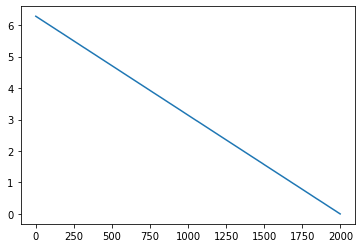

In [10]:
plt.plot(directions)

In [11]:
img_dir = (directions - np.pi) % (2*np.pi)
# the image directions will be the opposite of the camera direction

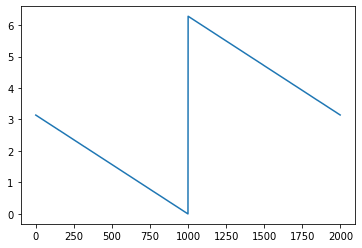

In [12]:
plt.plot(img_dir)

In [13]:
active_dir = np.zeros(img_dir.shape)
active_dir_val = np.zeros(img_dir.shape)

In [14]:
for i, d in enumerate(img_dir):
    dif = np.abs(angles_list - d)
    val = angles_list[dif.argmin()]
    active_dir_val[i] = val
    active_dir[i] = dif.argmin()

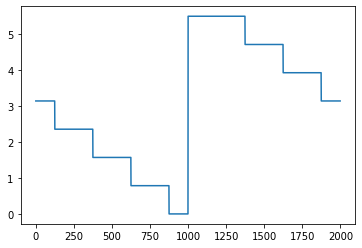

In [15]:
plt.plot(active_dir_val)

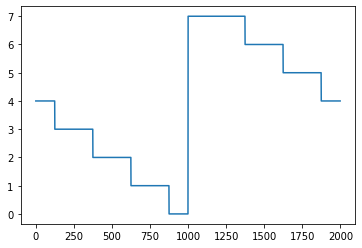

In [16]:
plt.plot(active_dir)

In [17]:
active_dir_timestamped = np.zeros((position_data.shape[0], 2))

In [18]:
active_dir_timestamped[:, 0] = position_data[:,0]
active_dir_timestamped[1:, 1] = active_dir

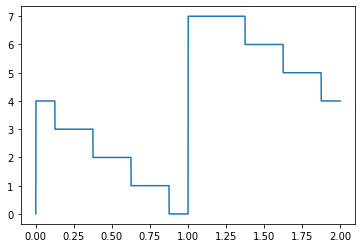

In [19]:
plt.plot(active_dir_timestamped[:,0], active_dir_timestamped[:,1])

In [20]:
np.savetxt("active_dir8.txt", active_dir_timestamped)

In [21]:
position_data[:,0]

array([1.000e-03, 2.000e-03, 3.000e-03, ..., 1.998e+00, 1.999e+00,
       2.000e+00])